In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing
import sklearn
from sklearn.preprocessing import Imputer
from sklearn.neighbors import NearestNeighbors 
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
from sklearn.decomposition import TruncatedSVD
from sklearn.utils import check_array
sns.set_style('whitegrid')
import matplotlib
import missingno as msno
%matplotlib inline

In [5]:
file_name = './AP1/train_data/train_data/train_groundtruth/{}.csv'
df_list = []
for i in range(1, 6001):
    df_list.append(pd.read_csv(file_name.format(i)))
df_truth = pd.concat(df_list)


In [6]:
file_name = './AP1/train_data/train_data/train_with_missing/{}.csv'
df_list = []
for i in range(1, 6001):
    df_list.append(pd.read_csv(file_name.format(i)))
df_train = pd.concat(df_list)
df_train

,time,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13
0,0,231.455136,7.065539,NaN,176.942885,74.724240,19.164741,160.585702,196.760533,15.656928,21.489706,52.592477,3.937804,202.422745
1,225,233.443180,6.284800,36.515232,176.942885,69.607372,17.303101,160.585702,187.434032,19.769887,21.489706,53.611339,3.937804,242.045839
2,800,229.467092,6.909391,36.515232,173.675164,67.962665,17.569049,155.495242,213.340979,28.124336,22.059795,54.630201,3.780817,261.064923
3,1515,225.491003,6.597096,34.860942,172.585924,64.855995,16.505255,158.888882,207.123312,25.296676,22.344839,49.535892,3.309856,199.252898
4,3013,231.455136,6.597096,43.132392,179.121366,62.663051,15.973358,160.585702,195.724255,19.127237,22.202317,34.252965,2.838896,188.158431
5,3746,231.455136,6.440948,44.786682,178.032126,NaN,NaN,158.888882,206.087034,15.528398,22.487361,30.177517,2.367935,192.913203
6,4434,229.467092,6.284800,46.440972,176.942885,62.114816,15.707409,158.888882,228.885147,16.042518,22.629883,30.177517,2.524922,NaN
7,4789,237.419269,7.065539,48.095262,183.478327,NaN,NaN,NaN,NaN,NaN,NaN,30.177517,2.681909,216.687059
8,6140,227.479047,6.128653,43.132392,178.032126,61.201089,15.042537,NaN,275.517651,15.656928,23.057450,NaN,2.367935,433.821611
9,7497,235.431225,7.221687,43.132392,181.299846,63.211287,15.973358,162.282522,NaN,14.885748,22.772405,30.177517,2.367935,210.347364


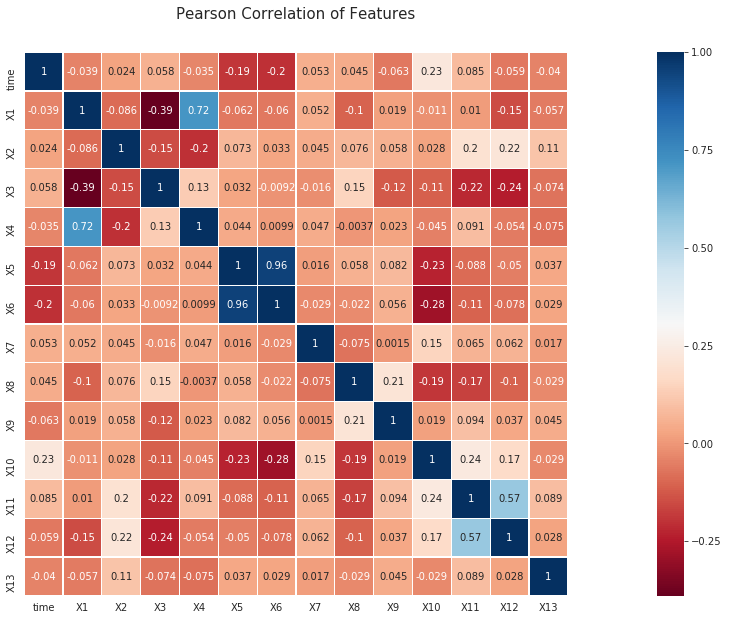

In [7]:
colormap = plt.cm.RdBu
plt.figure(figsize=(32,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_train.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
# Note that the categorical features have been neglected in the
# correlation matrix.

The proportion of entries with non-NaN values is 54.70%


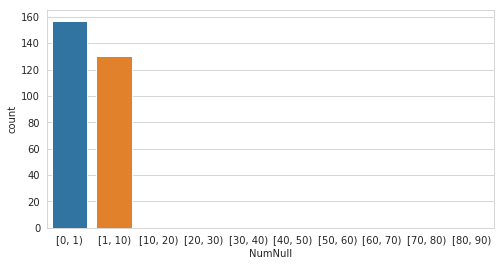

In [6]:
cons = df_train.iloc[0:, 5:]
cons['NumNull'] = cons.isnull().sum(axis=1)
print('The proportion of entries with non-NaN values is {:.2f}%'.format(len(cons[cons.NumNull==0])/len(cons)*100))
bins = [0,1,10,20,30,40,50,60,70,80,90]
cut = pd.cut(cons.NumNull, bins=bins, include_lowest=True, right=False)
fig, axis1 = plt.subplots(1,figsize=(8,4))
sns.countplot(x=cut, data=cut.to_frame(), ax=axis1)

plt.show()

In [22]:
print (df_train.isna().sum()*100/len(df_train))

time     0.000000
X1       5.316119
X2       5.472678
X3       5.530612
X4       5.394054
X5      16.537350
X6      19.158166
X7      19.299552
X8      18.627106
X9      18.840220
X10     19.425765
X11      4.885063
X12      4.837475
X13      6.850676
dtype: float64


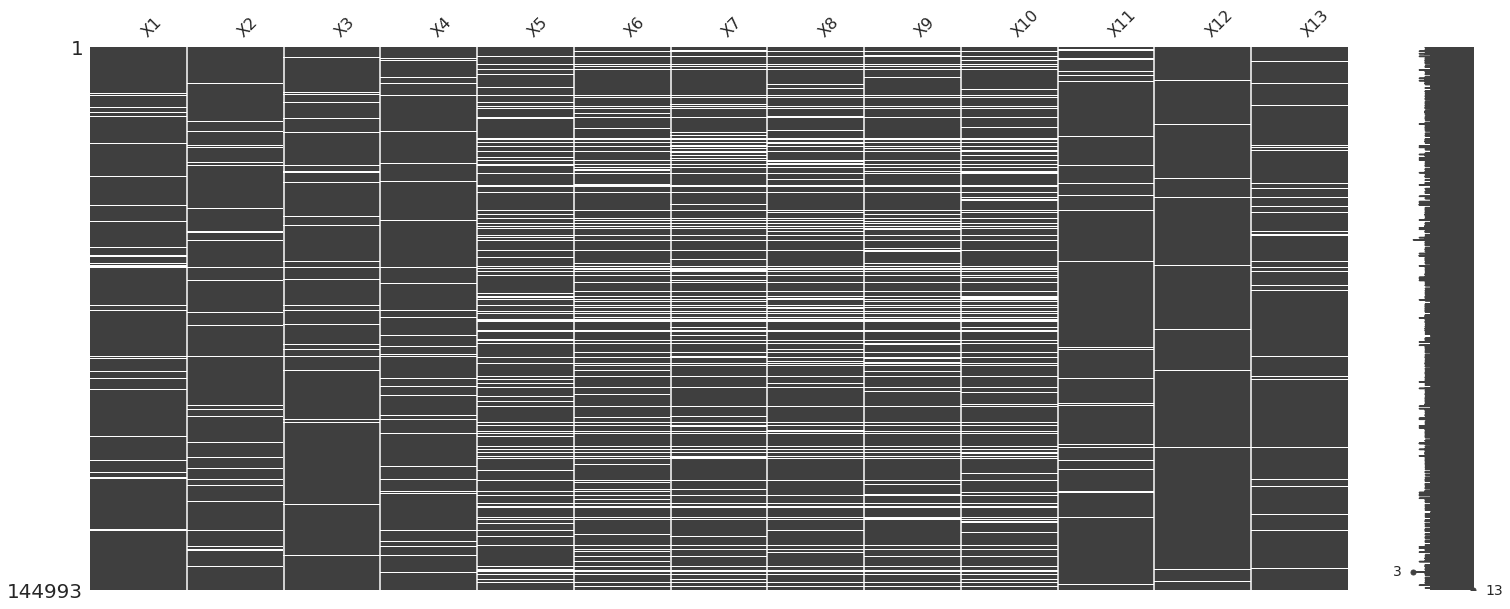

In [11]:
missingdata_df = df_train.columns[df_train.isnull().any()].tolist()
msno.matrix(df_train[missingdata_df])

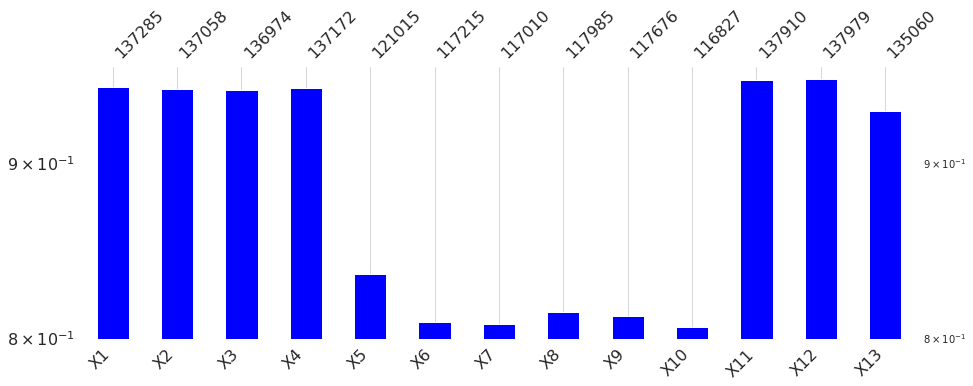

In [18]:
msno.bar(df_train[missingdata_df], color="blue", log=True, figsize=(15,5))